# LANGUAGE COMPETITION

Language competition study using the mean-filed approximation of the Abrams-Strogatz model. The study is performed on a regular lattice, with social interactions between nearest neighbours. 
The Abrams-Strogatz model studies the competition between two languages A and B. The language of each individual will change according to some parameters and his/her interactions: 
1) status or prestige $s$ of the given language     
2) volatility $a$  
3) number of neighbors $\sigma$ speaking the language  

The dynamics of this model is governed by the following equation: 

\begin{equation}
\frac{d \sigma_A}{d t} = ( \sigma_B ) p_{BA} - \sigma_A p_{AB} 
\end{equation}

where $\sigma_A$ ($\sigma_B$) is the proportion of people speaking language $A$ ($B$), $p_{BA}$ reflects the probability to change from language $B$ to language $A$, and $p_{AB}$ is the probability to change from $A$ to $B$: 

\begin{equation}
p_{AB} = (1-s)\sigma_B^a
\end{equation}
\begin{equation}
p_{BA} = s\sigma_A^a
\end{equation}

The parameter $s$ ranges from $0 \le s \le 1$, whereas the parameter $a$ determines the location of the fixed points. We start our model considering a scenario where the two languages have the same prestige $s=0.5$ (i.e., the same number of speakers) and $a=1$. 

## Usual imports and initial condition

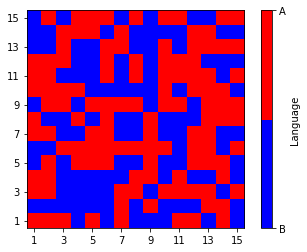

In [9]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt

### INITIAL CONDITION. RANDOMLY DISTRIBUTED LANGUAGES 

# A (mxn) table is created. Each point represents a citizen speaking language A or language B. The initial condition corresponds to
# a randomly distributed scenario with probabilities p( s(i) = A ) = p_a and p( s(i) = B ) = p_b. At the initial point, the two 
#probabilities are equal. 

#First step. Initial parameters and conditions ===========================================================================
    #Size of the sample and language probabilities 
m = 15
n = 15 
pa = .5   #pb = 1.0 - pa

    #Initial condition and representation 
popu = np.ones(shape=(m,n))
mask = np.random.rand(m,n)
popu[(mask <= (1.0 - pa) ) ] = -1 # Value 1 represents language A speakers. Value -1 represents language B speakers 
popu = popu.astype(np.int)

        #Figure param definition  
col = mpl.colors.ListedColormap(['Blue','Red'])
colbar_tick = np.array([ -1,1 ])

fig = plt.figure()
ax  = plt.axes()

plot = ax.matshow( popu , cmap = col , origin = 'lower')
ax.xaxis.tick_bottom()
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.yaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_major_formatter(lambda val, pos : r'{}'.format(int(val)+1) )
ax.yaxis.set_major_formatter(lambda val, pos : r'{}'.format(int(val)+1) )
fig.colorbar(plot,ax=ax, ticks=colbar_tick , label='Language' ).ax.set_yticklabels(['B', 'A'])

    #Number of speakers
na = np.count_nonzero(popu[popu > 0])
nb = np.count_nonzero(popu[popu < 0])
print('error') if nb != (m*n - na)  else None

## Language dynamics. Change of individual language

Language competition. The language of each individual will change according to parameters $a$, $s$ and the social interactions with his/her neighbors. As mentioned, the probability that determines the change of language is: 

\begin{equation}
p_{AB} = (1-s)\sigma_B^a
\end{equation}
\begin{equation}
p_{BA} = s\sigma_A^a
\end{equation}

where $\sigma$ is computed as follows:

\begin{equation}
\sigma_i= \frac{\text{number speakers language i}}{\text{total number neighbors}}
\end{equation}

In [10]:
# Steps:
# 1) A random node is selected
# 2) The language of each neighbor surrounding the node is computed, counting the number of speakers
# 3) The probability of change is computed. If the probability is larger than a uniformly distributed random number, the language
#    of the selected node is changed
# 4) The process is repeated 


# LANGUAGE DYNAMICS
    # Parameters 
a = 1.0
s = 0.5

    # Definition function per_bon. We consider a regular lattice with periodic boundary conditions. 
    # This function is used to apply this condition to the selected node. 
def per_bon(index,lattice_shape):
    """
    Returns periodic boundary lattice index for a given lattice shape. Arguments 'index' and 'lattice_shape' are 2D-tuples.

    Inputs:
    index: 2D-tuple. Represents the selected node. 
    lattice_shape: 2D-tupple. Shape of the lattice. 
    """
    return tuple( (i%s for i,s in zip(index,lattice_shape) ) )

for iterr in np.arange(10):

    # Select random node
    ii = np.random.randint(m)
    jj = np.random.randint(n)
    lang = popu[ii,jj] # Language spoken by the node

    # Neighbor language
    # Calculation of the languages spoken by the neighbors of the node. In case that the selected node 
    # is located at the boundaries of the lattice, periodic boundary conditions are applied to the system. 

    nn = np.array([]) # Array containing the neighbors 
    nn = np.append( nn , popu[ per_bon( (ii-1,jj), (m,n) ) ] )  # upper neighbor
    nn = np.append( nn , popu[ per_bon( (ii+1,jj), (m,n) ) ] )  # lower neighbor
    nn = np.append( nn , popu[ per_bon( (ii,jj-1), (m,n) ) ] )  # left neighbor
    nn = np.append( nn , popu[ per_bon( (ii,jj+1), (m,n) ) ] )  # right neighbor 
    nn = nn.astype(np.int)

    nA = np.count_nonzero( nn > 0 )/4.0 # Number of language A speakers
    nB = 1.0 - nA                       # Number of language B speakers 

    v = np.random.uniform() # Random value to be compared with the probability that determines the change of language 
    if lang == 1: 
        print(ii,jj,popu[ii,jj])
        pab = (1.0-s)*nB ** a
        popu[ii,jj] = -1  if (v < pab) else popu[ii,jj]
        print('first cond',lang,v,pab,v<pab,popu[ii,jj])
    else:
        pba = s*nA ** a
        popu[ii,jj] = 1 if (v < pba) else popu[ii,jj]
        print('second cond',lang,v,pba,v<pba,popu[ii,jj])

    #print(nn,nA,nB)   
    #nn = popu[ii-1 : ii+2 , jj-1 : jj+2]
    #nn

second cond -1 0.1724545034402003 0.25 True 1
second cond -1 0.9593436042658984 0.25 False -1
second cond -1 0.9635069586879228 0.25 False -1
8 7 1
first cond 1 0.8063193935803445 0.375 False 1
12 5 1
first cond 1 0.7923754769924224 0.25 False 1
11 7 1
first cond 1 0.7443175384442676 0.375 False 1
second cond -1 0.6364146414901166 0.25 False -1
second cond -1 0.79130638367405 0.0 False -1
10 0 1
first cond 1 0.480336695121388 0.0 False 1
0 1 1
first cond 1 0.617003371202211 0.125 False 1


In [11]:
print(ii,jj,popu[ii,jj])
print(popu)

0 1 1
[[ 1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1 -1]
 [-1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1]
 [ 1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1]
 [ 1  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1]
 [-1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1  1 -1]
 [-1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1]
 [ 1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1]
 [ 1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1  1  1]
 [-1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1]
 [ 1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1  1 -1 -1 -1  1 -1  1 -1  1  1  1  1 -1  1]
 [ 1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1 -1 -1]
 [-1 -1  1 -1 -1  1  1 -1 -1  1 -1  1  1  1  1]
 [-1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1 -1 -1]
 [-1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1  1  1]]


In [20]:
print(popu[0:2,:],'\n',popu[0:3,:])

[[ 1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1 -1]
 [-1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1]] 
 [[ 1  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1 -1]
 [-1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1]
 [ 1  1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1]]


In [16]:
for i , s in zip((15,4),(15,15)): print(i%s)

0
4


In [57]:
a = np.random.randint(100,size=(5,5))
print(a)

i = 0
i_end=5
j = 4
j_end=5

print(a[0 - 1:0+2,3])
for ii in a[3,4-3:4+4].flat:
    print(ii)
    

a[max(i-1,0):min(i+2,i_end), max(j-1,0):min(j+2,j_end)].flatte

[[61 87 11 51 37]
 [35 75 97 64 91]
 [14 19 47  9 16]
 [32 92 52 21 33]
 [69 94 64 50 77]]
[]
92
52
21
33


array([51, 37, 64, 91])

In [90]:
def latticeWrapIdx(index, lattice_shape):
    """returns periodic lattice index 
    for a given iterable index
    
    Required Inputs:
        index :: iterable :: one integer for each axis
        lattice_shape :: the shape of the lattice to index to
    """
    if not hasattr(index, '__iter__'): return index         # handle integer slices
    if len(index) != len(lattice_shape): return index  # must reference a scalar
    if any(type(i) == slice for i in index): return index   # slices not supported
    if len(index) == len(lattice_shape):               # periodic indexing of scalars
        mod_index = tuple(( (i%s + s)%s for i,s in zip(index, lattice_shape)))
        return mod_index
    raise ValueError('Unexpected index: {}'.format(index))

print(a)

def mio(index,lattice_shape):
    return tuple( (i%s for i,s in zip(index,lattice_shape) ) )

print(a[latticeWrapIdx((-17,18),(5,5))])
print(a[mio((-17,18),(5,5))])

[[61 87 11 51 37]
 [35 75 97 64 91]
 [14 19 47  9 16]
 [32 92 52 21 33]
 [69 94 64 50 77]]
21
21


In [87]:
#for r,s in zip((1,2),(3,4)):
#    print(r,s)
(-16%-5)

-1

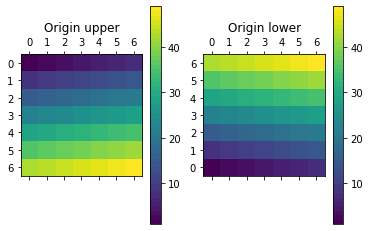

In [107]:
test = np.arange(1,50)
test = np.reshape(test,(7,7))

coltest=plt.cm.get_cmap('viridis',49)

fig, ax = plt.subplots(1,2)

pl1 = ax[0].matshow(test, cmap=coltest )
pl2 = ax[1].matshow(test, cmap=coltest, origin = 'lower')
ax[0].set( title='Origin upper')
ax[1].set( title='Origin lower' )
fig.colorbar(pl1, ax=ax[0] )
fig.colorbar(pl2, ax=ax[1] )

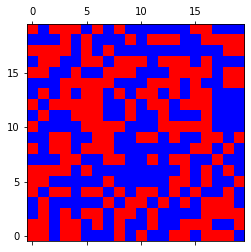

In [140]:
a = np.ones(shape=(m*n))
mask = np.random.rand(m*n)
a [ mask <= pa] = -1
b = np.reshape(a,(m,n))

fig = plt.figure()
ax  = plt.axes()

plot = ax.matshow( b , cmap = col , origin = 'lower')

In [130]:
print(a)
a = np.reshape(a,(20,20))
print(a)

[3 2 2 6 3 6 4 6 1 1 7 5 4 8 3 1 4 1 7 8 9 7 6 1 2 3 5 9 1 8 6 7 4 4 1 9 4
 6 5 4 6 0 0 6 0 4 8 5 2 9 8 6 1 4 2 1 1 2 2 6 6 5 6 2 5 3 4 2 5 4 7 1 9 2
 4 6 9 1 9 7 8 0 6 2 1 1 2 7 8 4 8 8 8 9 5 1 9 9 6 0 9 5 3 7 0 8 6 5 0 9 3
 2 9 3 3 6 4 8 9 0 6 5 9 8 8 1 3 7 5 0 6 0 1 8 4 9 7 1 9 7 2 3 4 7 3 0 4 0
 9 8 4 1 9 2 6 2 7 1 2 9 2 8 5 2 7 2 0 5 4 2 1 5 4 7 2 5 2 7 8 9 6 3 8 1 4
 3 3 9 3 5 1 3 2 6 5 2 3 8 1 5 6 2 4 3 9 7 0 7 6 0 4 0 5 8 7 5 0 6 3 2 1 7
 7 6 1 0 5 1 6 1 0 8 1 7 5 4 5 3 0 1 6 2 7 3 3 0 2 2 5 1 5 4 3 4 5 7 7 3 9
 2 2 7 5 2 7 9 9 8 8 1 5 8 1 2 9 9 5 2 1 9 3 6 3 5 7 0 7 9 5 4 1 5 5 3 5 0
 3 2 3 6 9 3 1 5 1 8 1 6 0 4 5 6 4 7 1 6 6 6 5 2 9 4 5 1 1 3 6 2 0 1 2 3 6
 3 2 0 4 5 4 4 1 2 5 6 9 7 2 0 2 1 0 1 7 2 8 1 8 5 7 3 4 8 7 1 8 0 4 9 4 2
 3 2 6 6 3 8 7 8 6 1 5 4 3 6 4 4 2 8 2 6 6 8 0 5 2 3 2 5 3 0]
[[3 2 2 6 3 6 4 6 1 1 7 5 4 8 3 1 4 1 7 8]
 [9 7 6 1 2 3 5 9 1 8 6 7 4 4 1 9 4 6 5 4]
 [6 0 0 6 0 4 8 5 2 9 8 6 1 4 2 1 1 2 2 6]
 [6 5 6 2 5 3 4 2 5 4 7 1 9 2 4 6 9 1 9 7]
 [8 0 6 2 1 1 2 

In [192]:
popu.astype(np.int)
popu

array([[ 1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.],
       [-1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.],
       [ 1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.],
       [-1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.],
       [-1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.,  1.],
       [-1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.],
       [ 1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.],
       [-1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.]])